# Hello, World - and 100 Qubit utility with Dr. Derek Wang (https://www.youtube.com/watch?v=93-zLTppFZw)

## Hello, World (but not)
This section creates a two-qubit circuit and visualizes the expectation values for these (2-qubit Bell circuit).
Bonus `pip show qiskit` because I couldn't tell if this was version 1.x or 2.x

In [3]:
pip install qiskit

  Using cached qiskit-2.1.0-cp39-abi3-macosx_10_12_x86_64.whl.metadata (12 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-macosx_10_12_x86_64.whl.metadata (10 kB)
  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.0-cp313-cp313-macosx_14_0_x86_64.whl.metadata (61 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.4.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.14.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached pbr-6.1.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached qiskit-2.1.0-cp39-abi3-macosx_10_12_x86_64.whl (7.3 MB)
Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_x86_64.whl (6.6 MB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
Using cached rustworkx-0.16.0-cp39-abi3-macosx_10_12_x86_64.whl (2.1 MB)
Using cached scipy-1.16.0-cp313-cp313-macosx_14_0_x86_64.whl (23.4 MB)
Using cached s

In [2]:
from qiskit import QuantumCircuit

In [1]:
qc = QuantumCircuit(2)

NameError: name 'QuantumCircuit' is not defined

In [10]:
qc.h(0)
qc.cx(0,1)

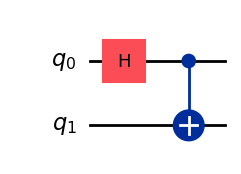

In [11]:
qc.draw(output = 'mpl')

In [12]:
pip show qiskit

Name: qiskit
Version: 2.1.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /Users/quantum_nontrivial/Documents/coding-problems/.venv/lib/python3.13/site-packages
Requires: dill, numpy, rustworkx, scipy, stevedore, typing-extensions
Required-by: qiskit-aer
Note: you may need to restart the kernel to use updated packages.


In [13]:
from qiskit.quantum_info import Pauli
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

In [14]:
pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [15]:
from qiskit_aer.primitives import Estimator

In [ ]:
estimator = Estimator()
job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        , -0.02734375, -0.02734375,  1.        ,  0.02734375,
        0.02734375]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000996025, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001483307, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 16384, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9992523193359375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000996025, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [

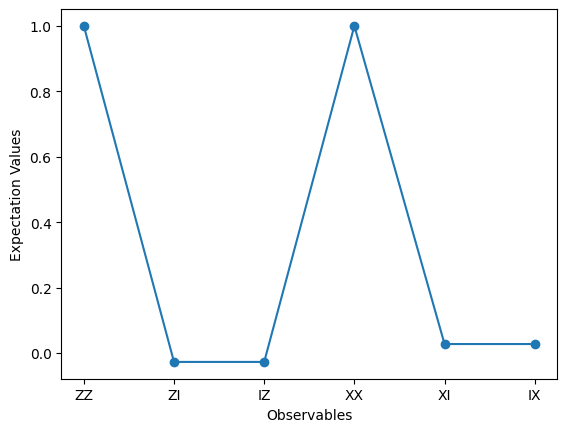

In [20]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values
plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.show()

## This is a new section that we'll talk about in a moment
Extend the example to a n-qubit GHZ state

In [64]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
# qc.draw(output = 'mpl') # uncomment this for n < 20 otherwise the drawn image is too big and not useful

In [65]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = [ 'Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(op_string) for op_string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [61]:
pip install qiskit_ibm_runtime

6651.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [1]:
# THINGS BROKE BADLY IN THIS SECTION - QiskitRuntimeService API changed 
# THIS WORKS
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend = QiskitRuntimeService().least_busy(simulator=False, operational=True, min_num_qubits=100)
pass_manager = generate_preset_pass_manager(optimization_level=1)

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

# THIS DOES NOT WORK...
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# ... HERE
# backend_name = 'ibm_brisbane'  # no longer able to choose the back end by name in 2.x??
# backend = QiskitRuntimeService().get_backend(backend_name)  # this is not in the 2.x API anymore
# pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

# qc_transpiled = pass_manager.run(qc)
# operators_transpiled_list = [op.apply_layout(qc.transpiled.layout) for op in operators]



/var/folders/kf/vmdscp_n18qfgr6xz5zv0sw40000gn/T/ipykernel_85609/1780921959.py:6: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  backend = QiskitRuntimeService().least_busy(simulator=False, operational=True, min_num_qubits=100)


NameError: name 'qc' is not defined

In [68]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
# options.optimization_level = 0  # no longer an option
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://quantum.cloud.ibm.com/docs/guides/transpile) for instructions to transform circuits and the primitive examples (https://quantum.cloud.ibm.com/docs/guides/primitives-examples) to see this coupled with operator transformations.'

This is where I stopped on this exercise. I tried selecting my back end instance but the API changed and does not seem to allow that due to the platform upgrades effective Tuesday, July 1 and this error message:
> IBMInputValueError: 'The instruction cx on qubits (0, 1) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://quantum.cloud.ibm.com/docs/guides/transpile) for instructions to transform circuits and the primitive examples (https://quantum.cloud.ibm.com/docs/guides/primitives-examples) to see this coupled with operator transformations.'

I don't have enough experience with this yet to refactor accordingly for the upgraded platform so I'll leave this for today.